In [1]:
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from cycler import cycler

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['figure.figsize'] = [10, 7]

cc = (cycler(linestyle=['-', '--', '-.']) * cycler(color=list('bgrcmk')))

plt.rc('axes', prop_cycle=cc)

In [2]:
#os.environ['OFT_ROOTPATH'] = '/Users/ansonbraun/Documents/Columbia/Research/OpenFUSIONToolkit/src/'

thincurr_python_path = os.getenv('OFT_ROOTPATH')
if thincurr_python_path is not None:
    sys.path.append(os.path.join(thincurr_python_path,'python'))
#sys.path.append('/Users/sophiaguizzo/Documents/OFT_thincurr/install_release/python')
from OpenFUSIONToolkit.ThinCurr import ThinCurr
from OpenFUSIONToolkit.ThinCurr.sensor import circular_flux_loop, save_sensors, flux_loop
from OpenFUSIONToolkit.util import build_XDMF
from OpenFUSIONToolkit.io import histfile
from OpenFUSIONToolkit.TokaMaker.util import create_isoflux, read_eqdsk

In [3]:
arc_torus = ThinCurr(nthreads=4)

arc_torus.setup_model(mesh_file = 'ARC_V2E_coil_1m-homology.h5', xml_filename = 'arc_200_coils.xml', jumper_start = 3)
arc_torus.setup_io()

rerun = True

#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   main
Revision id:          2c5f6aa
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    4
Fortran input file    = oftpyin                                                                         
XML input file        = none                                                                            
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


Creating thin-wall model
 Orientation depth =       65806
  Loading V(t) driver coils
  Loading I(t) driver coils

  # of points    =        53665
  # of edges     =       160995
  # of cells     =       107330
  # of holes     =            2
  # of Vcoils    =            0
  # of closures  =            1
  # of Icoils    =            1

  Building holes

  Loading region resistivity:
     1

In [4]:
#Computing self-interactions matrices
arc_torus.compute_Mcoil()
#arc_torus.compute_Lmat(use_hodlr = True, cache_file = 'arc_filament_lmat')
arc_torus.compute_Lmat(use_hodlr = True, cache_file = 'arc_200coil_1m_lmat')
arc_torus.compute_Rmat()

 Building coil<->element inductance matrices
     Time =  3m 29s      
 Building coil<->coil inductance matrix
 Partitioning grid for block low rank compressed operators
   nBlocks =                  64
   Avg block size =          838
   # of SVD =                393
   # of ACA =                615

 Building block low rank inductance operator
   Building hole and Vcoil columns
   Reading HODLR matrix from file: arc_200coil_1m_lmat
   Building diagonal blocks
     10%
     20%
     30%
     40%
     50%
     60%
     70%
     80%
     90%
   Building off-diagonal blocks using ACA+
     10%
     20%
     30%
     40%
     50%
     60%
     70%
     80%
     90%
     Compression ratio:   4.2%  ( 1.20E+08/ 2.88E+09)
     Time = 21s          
 Building resistivity matrix


In [5]:


sensors = []

save_sensors(sensors)
Msensor, Msc, sensor_obj = arc_torus.compute_Msensor('floops.loc')


 Loading floop information:
   # of floops =           0

 Setting jumper information:
       1   5.258155415494210E-01   1.883797233119456E-03  -8.505965363044183E-01
       2  -2.197079151548564E-03   9.999960643579783E-01   1.744738305939149E-03
       3  -1.340133105903737E-01   9.909600006737257E-01  -6.221707911633141E-03
 Building element->sensor inductance matrix
 Building coil->sensor inductance matrix


In [6]:
t_steps_I = np.array([-1.0e-3, 0, 0.3e-3,  1.5e-3])

plasma_I = np.array([0.0e6, 0.0e6, 5.6605E3, 5.6605E3]) #200 coils
VF_I = np.array([0.0, 0.0, 0.0, 0.0])

curr_arr = np.stack((t_steps_I, plasma_I)).T 
v_arr = np.stack((t_steps_I, VF_I)).T 

In [7]:
arc_torus.n_vcoils

np.int32(0)

In [8]:
dt = 0.03e-3
nsteps = 50

#reset all of the files:
run_files = [f for f in os.listdir('.') if f.endswith('.rst') or f.endswith('.xmf')]
for file in run_files:
    os.remove(file)

arc_torus.run_td(dt,nsteps,status_freq=1,plot_freq=1,coil_currs=curr_arr, sensor_obj = sensor_obj)
#arc_torus.run_td(dt,nsteps,status_freq=1,plot_freq=1,coil_currs=curr_arr, sensor_obj = sensor_obj)
arc_torus.plot_td(nsteps, plot_freq = 1)
arc_torus.build_XDMF()


 Starting simulation
 Timestep            1   2.99999992E-05   3.60576415             145
 Timestep            2   5.99999985E-05   4.17490244             136
 Timestep            3   9.00000014E-05   4.06255436             147
 Timestep            4   1.19999997E-04   4.06680346             144
 Timestep            5   1.50000007E-04   4.05740595             146
 Timestep            6   1.80000003E-04   4.05561590             143
 Timestep            7   2.09999998E-04   4.05833817             146
 Timestep            8   2.39999994E-04   4.06518793             143
 Timestep            9   2.69999990E-04   4.07609701             146
 Timestep           10   3.00000014E-04   2.92603612             146
 Timestep           11   3.30000010E-04   1.08830535             143
 Timestep           12   3.60000005E-04  0.915576041             145
 Timestep           13   3.90000001E-04  0.862135887             144
 Timestep           14   4.19999997E-04  0.836906791             146
 Timestep   

In [46]:
jumper_data = histfile('jumpers_actual_res.hist')

Text(0.32, 0.5, 'TQ \ntime')

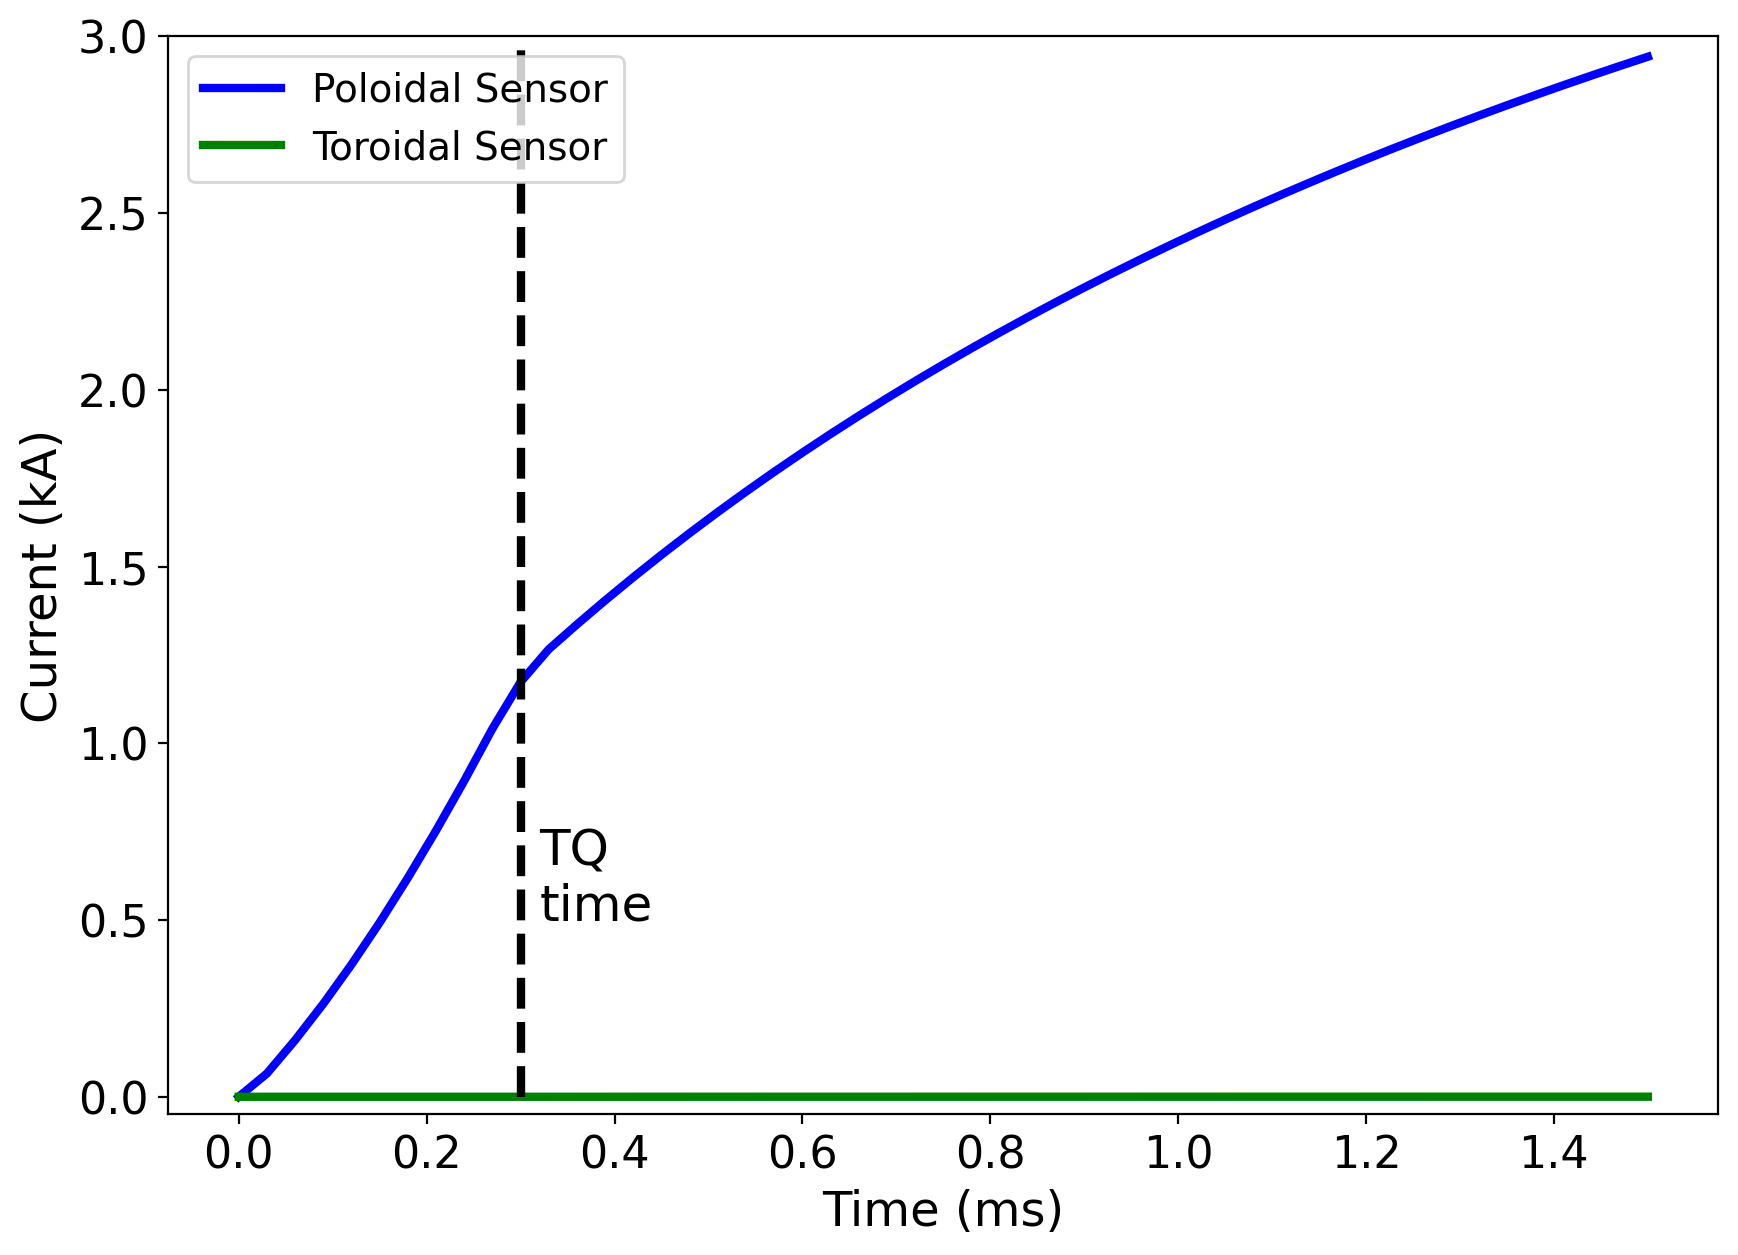

In [47]:
plt.plot(jumper_data['time']*1000, jumper_data['JUMPER_0001']/1000, label = 'Poloidal Sensor', lw = 3)
#plt.plot(jumper_data['time']*1000, jumper_data['JUMPER_0002'], label = '2')
plt.plot(jumper_data['time']*1000, jumper_data['JUMPER_0003']/1000, label = 'Toroidal Sensor', lw = 3)
plt.legend(fontsize = 14)
plt.xlabel('Time (ms)')
plt.ylabel('Current (kA)')
plt.vlines(x = 0.3, ymin = 0, ymax = 3, color = 'k', linestyle = '--', lw = 3)
plt.ylim([-0.05,3])
plt.text( 0.32, 0.5, 'TQ \ntime', fontsize = 18)

Text(0.32, 0.5, 'TQ \ntime')

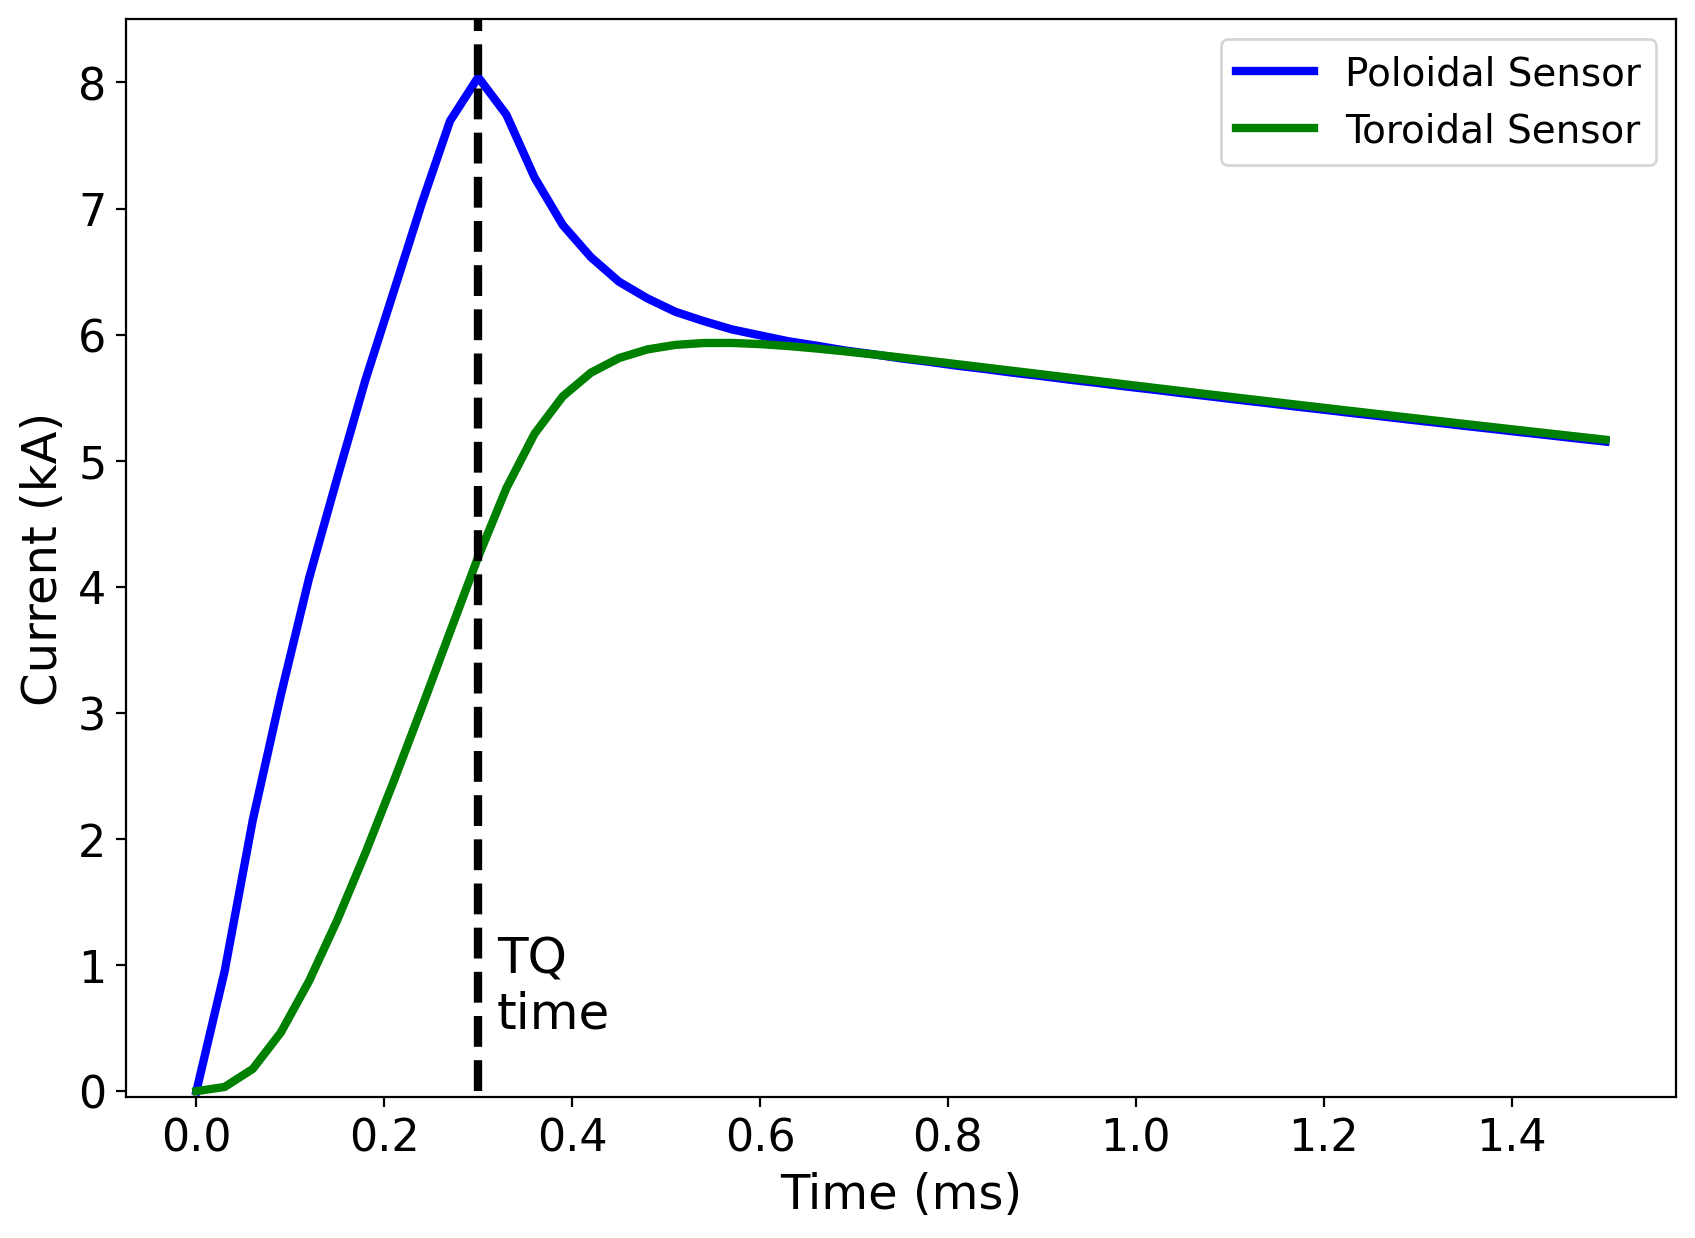

In [52]:
jumper_highres = histfile('jumpers_e-1.hist')

plt.plot(jumper_data['time']*1000, jumper_highres['JUMPER_0001']/1000, label = 'Poloidal Sensor', lw = 3)
#plt.plot(jumper_data['time']*1000, jumper_data['JUMPER_0002'], label = '2')
plt.plot(jumper_data['time']*1000, -jumper_highres['JUMPER_0003']/1000, label = 'Toroidal Sensor', lw = 3)
plt.legend(fontsize = 14)
plt.xlabel('Time (ms)')
plt.ylabel('Current (kA)')
plt.vlines(x = 0.3, ymin = 0, ymax = 8.5, color = 'k', linestyle = '--', lw = 3)
plt.ylim([-0.05,8.5])
plt.text( 0.32, 0.5, 'TQ \ntime', fontsize = 18)